In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os
#os.chdir("C:/Users/Pierre/Documents/truc de glaps k means")

j'importe les donnees

In [9]:
f = open("raw-data.csv", "r")
T = f.readlines()
f.close()

print(T[0].split(",")[4])
X = [int(t.split(",")[4]) for t in T[1:]]
print(X)

socialNbFollowers
[147, 167, 137, 131, 167, 130, 121, 53, 744, 57, 127, 102, 46, 35, 123, 45, 48, 176, 47, 85, 107, 60, 73, 125, 103, 56, 51, 50, 54, 47, 36, 40, 23, 83, 52, 42, 28, 96, 58, 53, 63, 30, 58, 28, 53, 22, 21, 47, 41, 67, 100, 39, 9, 15, 82, 40, 111, 172, 43, 24, 94, 30, 18, 16, 57, 17, 17, 52, 48, 31, 24, 20, 19, 7, 42, 21, 18, 38, 28, 25, 18, 13, 62, 37, 35, 34, 21, 15, 14, 29, 28, 25, 15, 10, 52, 34, 31, 31, 27, 16, 14, 11, 36, 23, 22, 19, 17, 16, 36, 35, 23, 22, 20, 14, 47, 36, 23, 15, 7, 44, 37, 22, 17, 16, 14, 8, 52, 48, 44, 32, 19, 17, 12, 12, 71, 44, 22, 18, 18, 18, 16, 11, 4, 41, 40, 18, 15, 12, 6, 6, 23, 22, 13, 13, 12, 12, 10, 8, 353, 44, 35, 20, 17, 16, 10, 9, 9, 8, 7, 6, 89, 40, 33, 27, 18, 17, 16, 15, 14, 12, 8, 7, 5, 74, 39, 28, 24, 23, 21, 21, 21, 20, 19, 15, 14, 13, 12, 12, 12, 11, 11, 11, 10, 7, 24, 21, 19, 19, 17, 17, 16, 15, 13, 13, 13, 12, 12, 10, 10, 9, 9, 9, 9, 8, 7, 7, 6, 42, 42, 34, 34, 24, 23, 22, 21, 21, 20, 19, 18, 17, 15, 15, 15, 14, 14, 12, 12,

je les affiche, note l'echelle semi log

[0, 0, 0, 84939, 8219, 2720, 813, 539, 336, 235, 164, 121, 99, 87, 55, 51, 42, 37, 35, 28, 23, 24, 25, 26, 22, 21, 20, 13, 27, 15, 21, 18, 6, 5, 5, 6, 9, 5, 4, 3, 7, 3, 6, 5, 4, 2, 4, 5, 4, 1, 1, 1, 4, 3, 1, 0, 1, 3, 3, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

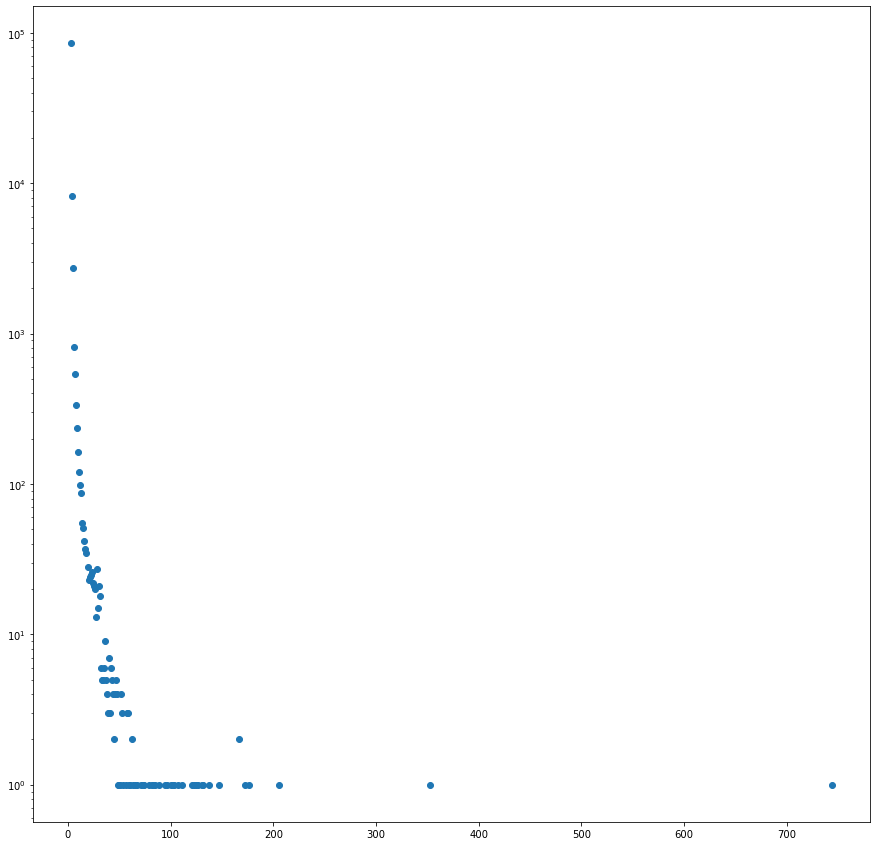

In [10]:
maxi = max(X)
compteur = [0]*(maxi+1)
for x in X:
    compteur[x] += 1

print(compteur)    

plt.figure(figsize=(15,15))

A, B = [], []
for i in range(maxi+1):
    if compteur[i]!=0:
        A.append(i), B.append(compteur[i])
plt.scatter(A, B)
plt.yscale("log")
plt.show()

je code k-means a la main, (on avait vu ca rapidement)

In [11]:
def closest(x,avg,d):
    D = [d(x,y) for y in avg]
    return D.index(min(D))

def init_avg(X, k):
    '''
    on veut des vecteurs de base qui sont differents les uns des autres
    on les tire au hasard de facon uniforme
    '''
    res = []
    while len(res) != k:
        y = X[np.random.randint(0, len(X))]
        if y not in res:
            res.append(y)
    return res

def kmeans(X,k,d, avg=None):
    '''
    X les donnees
    k le nombre d'ensembles de la partition
    d une distance
    avg si tu veux initialiser a la main les barycentres
    
    renvoie une liste de meme taille que les donnees
    chaque element correspond a la classe de l'indice
    ie classes[i] est la classe de X[i]
    
    et renvoie aussi les centres
    '''
    if avg==None:
        avg = init_avg(X,k)
    classes = [closest(x, avg, d) for x in X]
    same = False
    while not same:
        #calcul barycentres
        avg = []
        for i in range(k):
            classe = [X[j] for j in range(len(X)) if classes[j]==i]
            avg.append(sum(classe)/len(classe))
        #calcul des classes
        classes2 = [closest(x, avg, d) for x in X]
        same = (classes == classes2)
        classes = classes2
    return classes, avg

In [12]:
def d_euclid(x,y):
    return abs(x-y)

on affiche les min et max de chaque classe pour visualiser la chose

In [13]:
def affiche_ranges(X, C, k):
    for i in range(k):
        classe = [X[j] for j in range(len(X)) if C[j]==i]
        print(min(classe), max(classe))

avec 3 classes

In [14]:
for i in range(5):
    print("essai", i,"===============================")
    affiche_ranges(X,kmeans(X,3,d_euclid)[0], 3)

essai 0 ===============================
3 15
16 111
121 744
essai 1 ===============================
3 15
16 111
121 744
essai 2 ===============================
3 15
16 111
121 744
essai 3 ===============================
3 15
16 111
121 744
essai 4 ===============================
3 15
16 111
121 744


avec 4 classes

In [15]:
k = 4

for i in range(5):
    print("essai", i,"===============================")
    affiche_ranges(X,kmeans(X,k,d_euclid)[0], k)

essai 0 ===============================
3 4
20 111
5 19
121 744
essai 1 ===============================
3 4
5 19
20 111
121 744
essai 2 ===============================
3 4
121 744
5 19
20 111
essai 3 ===============================
3 4
20 111
5 19
121 744
essai 4 ===============================
3 4
5 19
20 111
121 744


on a des resultats stables

on calcule les wcss

soit $P=(P_i)$ une partition associée à des centres $(c_i)$

$WCSS = \sum_{P_i\in P} \sum_{x\in P_i} d(x,c_i)^2$

(j avais jamais fait, normalement la formule est bonne)

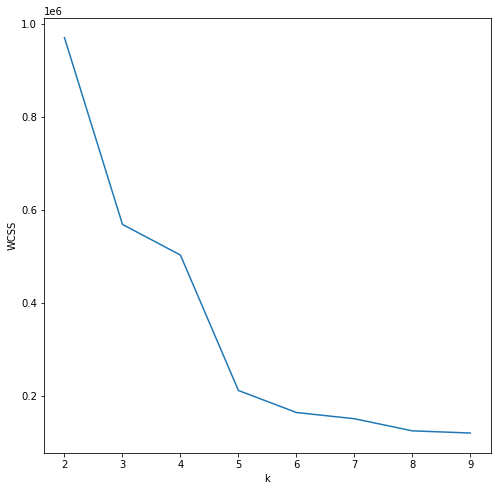

In [18]:
WCSS = []

for k in range(2,10):
    C, avg = kmeans(X, k, d_euclid)
    res = 0
    for i in range(len(X)):
        res += d_euclid(X[i], avg[C[i]])**2
    WCSS.append(res)

plt.figure(figsize=(8,8))
plt.plot(range(2, 10), WCSS)
plt.ylabel("WCSS")
plt.xlabel("k")
plt.show()

In [17]:
k=5
affiche_ranges(X,kmeans(X,k,d_euclid)[0], k)

3 3
4 15
73 205
353 744
16 71


le hasard les affiche dans l'ordre c est magnifique